In [2]:
#!pip install matplotlib > None

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Проблема I

В этой лабораторной мы попробуем оценить точность результата вычисления по внешне невинной формуле в арифметике с плавающей запятой. 
Обычно делая арифметические операции мы не задумываемся над точностью результата, однако даже одна операция может значительно ухудшить точность.
Рассмотрим несколько примеров.

Чтобы оценить точность вычислений, нам необходимо знать точный ответ.
Так как мы только хотим проиллюстрировать одну из проблем с потерей точности,
то мы можем сами сконструировать формулу так, чтобы точных ответ был заранее известен.
Мы будем вычислять значение функции, которая эквивалента в точной арифметике тождественному преобразованию, т.е. точный результат вычисления фукнции совпадает с аргументом функции:
$$f(x)=x.$$
Однако в арифметике с плавающей запятой не все свойства арифметических операций верны,
поэтому результат будет получаться с ошибкой.
Мы будем вычислять относительную ошибку по обыкновенной формуле:
$$\sigma(x_0,x)=\frac{|x_0-x|}{|x_0|},$$
где $x_0$ - точное значение, а $x$ - приближенное.


In [4]:
def relative_error(x0, x): return np.abs(x0-x)/np.abs(x0)

Исходные данные нам даны с точностью представления вещественных чисел числами с плавающей запятой, т.е. с половиной машинной точности.
Мы будем проводить вычисления в арифметике двойной точности.

In [5]:
eps=np.finfo(np.double).eps
print("Машинная точность:",eps)

Машинная точность: 2.220446049250313e-16


Рассмотрим функцию, выполняющую $n$ делений на число $d$, а затем $n$  умножений на $d$.
Ясно, что в точной арифметике эта функция не должна изменять аргумент.

In [6]:
def f_div_mult(x, d=np.pi, n=52):
    for k in range(n): x=x/d
    for k in range(n): x=x*d
    return x

Создадим набор тестовых значений и проверим точность вычислений на этом наборе.

In [7]:
x0=np.logspace(-4,4,100,dtype=np.double)
x=f_div_mult(x0)
err=relative_error(x0, x)
print("Ошибки",err[:4],"...")

Ошибки [1.35525272e-16 3.37546384e-16 5.60473876e-16 4.65315259e-16] ...


Гораздо лучше результаты воспринимаются на картинке.
При оценки точности мы всегда выводим относительную ошибку в логарифмической шкале.

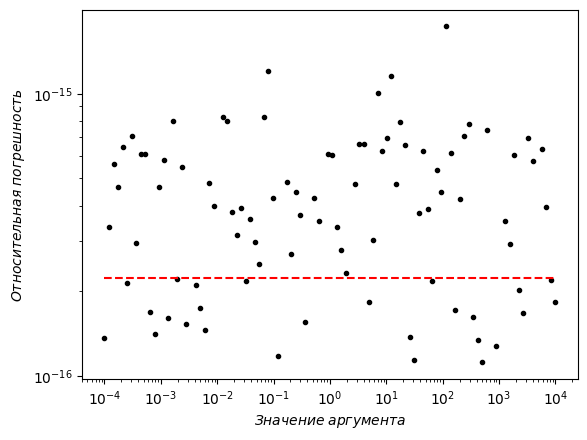

In [8]:
def plot_error(x0,err):
    mask=np.logical_and(err>0,err<np.inf)
    plt.loglog(x0[mask],err[mask],".k")
    plt.loglog(x0,[eps]*len(err),"--r") # машинная точность для сравнения
    plt.xlabel("$Значение\;аргумента$")
    plt.ylabel("$Относительная\;погрешность$")
    plt.show()    
    
plot_error(x0,err)

Мы видим, что погрешность в несколько раз больше машинной точности, обозначенной красной пунктирной линией, однако погрешность остается пренебрежимо малой.
Рассмотрим другую функцию, очень похожу на предыдущую, однако теперь мы будем сначала извлекать корни, а затем возводить результат в квадрат. 

In [9]:
def f_sqrt_sqr(x, n=52):
    for k in range(n): x=np.sqrt(x)
    for k in range(n): x=x*x
    return x

Проведем вычисления и построим график ошибки на том же наборе значений.

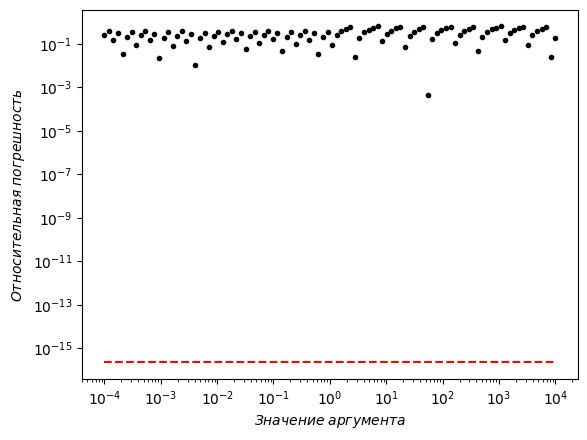

In [10]:
x=f_sqrt_sqr(x0)
err=relative_error(x0, x)
plot_error(x0, err)

Ошибка почти 100%! 
Как такое могло произойти? 
Не возникло исключений, нет сообщений об ошибках, но результат не содержит ни одной верной цифры.

Большинство людей предполагают, что причина столь большой ошибки заключается в том, что квадратный корень нельзя вычислить точно.
Чтобы проверить это утверждение мы снова вычислим 52 квадратных корня и 52 квадрата, но изменим порядок вычислений на следующий: корень, квадрат, корень, квадрат,..

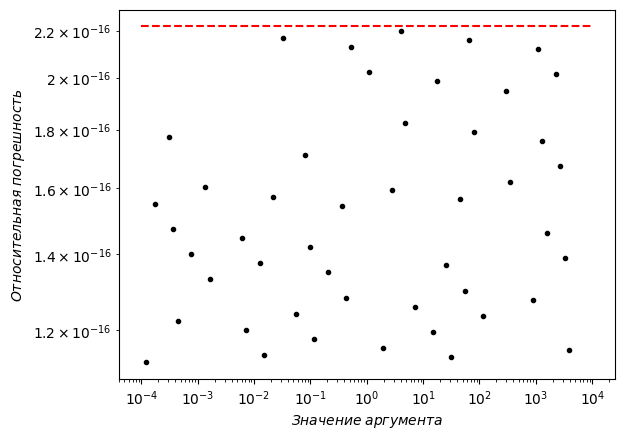

In [11]:
def f_sqrt_sqr_interleave(x, n=52):
    for k in range(n): 
        x=np.sqrt(x)
        x=x*x
    return x

x=f_sqrt_sqr_interleave(x0)
err=relative_error(x0, x)
plot_error(x0, err)

Теперь мы получаем результат примерно с машинной точностью. 
Как можно обьяснить тот факт, что выполняя одни и те же операции в разном порядке, можно получить на много порядков отличающиеся ошибки?

## Задание 

### 1. Обьясните, чем отличаются два рассмотренных примера? Почему настолько отличается точность вычислений?

Пусть $\varepsilon$ - погрешность округления. Будем считать, что опреации сложения, умножения, деления, возведения в степень и извлечения корня не вносят дополнительной погрешности.

При делении и умножении и делении на 2 - относительная ошибка не меняется, а при возведении в квадрат - увеличивается в два раза, а при извелечении квадратного корня - уменьшается в два раза, а при каждой операции происходит округление, которое добавляет $\varepsilon$ к текущей ошибке.

Рассмотрим деление числа на заранее известное число 52 раза и умножение на это же число 52 раза. Таблица развития относительной ошибки для этого случая представлена ниже.

| №   | Операция | Относительная ошибка |
|-----|----------|----------------------|
| 0   |          | $\varepsilon$        |
| 1   | \        | $2\varepsilon$       |
| 2   | \        | $3\varepsilon$       |
| ... | ...      | ...                  |
| 52  | \        | $53\varepsilon$      |
| 53  | *        | $54\varepsilon$      |
| ... | ...      | ...                  |
| 104 | *        | $105\varepsilon$     |

Рассмотрим развитие ошибки в случае возведения в квадрат и извлечения корня. Аналогичная таблица приведена ниже. 

| №   | Операция   | Относительная ошибка                                                                                  |
|-----|------------|-------------------------------------------------------------------------------------------------------|
| 0   |            | $\varepsilon$                                                                                         |
| 1   | $\sqrt{x}$ | $\varepsilon_0/2 + \varepsilon = 1.5 \varepsilon$                                                     |
| 2   | $\sqrt{x}$ | $\varepsilon_1/2 + \varepsilon = 1.75 \varepsilon$                                                    |
| ... | ...        | ...                                                                                                   |
| 52  | $\sqrt{x}$ | $2\varepsilon$                                                                                        |
| 53  | $x^2$      | $2 \cdot \varepsilon_{52} + \varepsilon = 5 \varepsilon$                                              |
| ... | ...        | ...                                                                                                   |
| 104 | $x^2$      | $2 \cdot \varepsilon_{103} + \varepsilon $ |

Заметим, что ошибка при взятии корня и возведении в степень ошибка накапливается степенным образом в зависимости от количества операций, а в случае умножения и деления - линейным образом.

<function matplotlib.pyplot.show(close=None, block=None)>

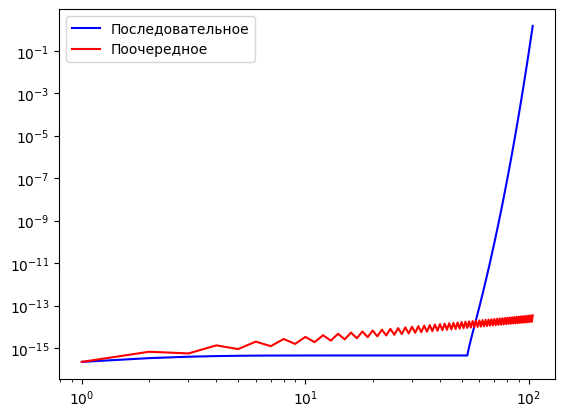

In [12]:
eps0=np.finfo(np.double).eps
iteration=[]
altern=[eps0]
direct=[eps0]

for i in range(1,105):
    iteration.append(i)

for j in iteration[:-1]:
    if j<len(iteration)/2+1:
        direct.append(direct[j-1]/2+eps0)
    else:
        direct.append(direct[j-1]*2+eps0)

for j in iteration[:-1]:
    if j%2==0:
        altern.append(altern[j-1]/2+eps0)
    else:
        altern.append(altern[j-1]*2+eps0)

fig, ax = plt.subplots()
ax.loglog(iteration, direct ,'b', label='Последовательное')
ax.loglog(iteration, altern ,'r', label='Поочередное')
plt.legend()
plt.show

После извлечения 52 корней относительная погрешность примерно составит $\delta x \approx 2\epsilon^2$.


Затем, если 52 раза возвести число в квадрат, то относительная погрешность составит примерно: $\delta x \approx 2^{52} \cdot \epsilon^2$.

### 2. Предложите альтернативный способ вычислений, который будет находить 52 корня из данного числа с такой точностью, что последующее возведение в квадрат 52 раза будет давать исходное число с относительной погрешностью близкой к машинной точности. 

Поскольку деление и умножение дает значительное меньшее накопление ошибки, целесообразно перейти к логарифмическому представлению числа: тогда интересующее нас возведение в степень будет представление как умножение.

Рассмотрим эволюцию ошибок:
|   | $\Delta a$                                              | $\delta a$                            |
|----------|---------------------------------------------------------|---------------------------------------|
| x        | $x \varepsilon$                                         | $\varepsilon$                         |
| $ln(x)$  | $\Delta x/x + \varepsilon ln(x) = \varepsilon^2 ln(x)$  | $\varepsilon/\|ln(x)\|+\varepsilon$   |
| + или -  | $\varepsilon + \varepsilon \|ln(x)\|$                   | $\varepsilon/\|ln(x)\| + \varepsilon$ |
| $e^x$    | $e^x \cdot (\varepsilon + \varepsilon * \|ln(x)\|)  $   | $\varepsilon \cdot \|ln(x)\| + \varepsilon$ |

Воспользуемся подсказкой 2 для шаблона реализации собственного класса чисел с плавающей запятой:

In [13]:
# Пример собственной реализации чисел на основе чисел с плавающей запятой
class MyNumber(object):
    def __init__(self, zeta): 
        """Конструктор принимает zeta, но обьект соответствует числу x=log zeta."""
        self.zeta=zeta
    def __str__(self):
        """На экран выводится значение x, которое может быть менее точно, 
        чем храниемое значение."""
        return "{}".format(self.to_float())
    def from_float(x):
        """Создает число со значением, равным x."""
        return MyNumber(np.log(x))
    def to_float(self):
        """Преобразует число в формат с плавающей запятой"""
        return np.exp(self.zeta)
    def __mul__(self, other):
        """Перезагрузка операции умножения."""
        if isinstance(other, MyNumber):
            # Умножаем два MyNumber, используя их значения в формате с плавающей запятой
            return MyNumber(self.zeta + other.zeta)
        else:
            raise TypeError("Умножение возможно только с объектами MyNumber")
    def __pow__(self, other):
        """Перезагрузка операции возведения в степень."""
        if isinstance(other, MyNumber):
            return MyNumber(self.zeta * other.to_float())
        elif isinstance(other, (int, float)):  # Allow any float or int
            return MyNumber(self.zeta * other)
        else:
            raise TypeError("Возведение в степень возможно только с объектами MyNumber или числами")
    def __truediv__(self, other):
        """Перезагрузка операции деления."""
        if isinstance(other, MyNumber):
            return MyNumber(self.zeta - other.zeta)
        else:
            raise TypeError("Деление возможно только с объектами MyNumber")        

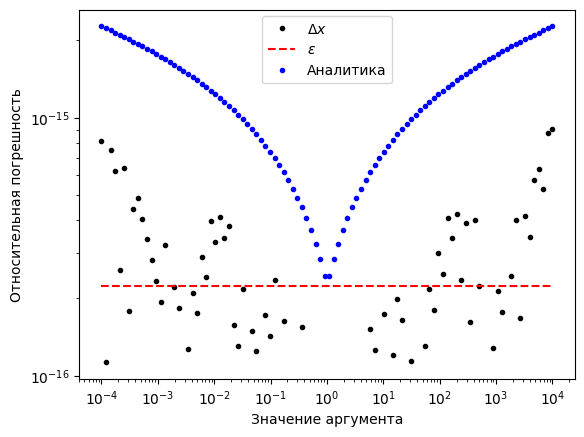

In [14]:
def f_sqrt_sqr_fixed(x, n=52):
    for k in range(n): x=x**(0.5)
    for k in range(n): x=x**2
    return x

x0=np.logspace(-4,4,100,dtype=np.double)
x1=MyNumber.from_float(x0)
x2=MyNumber.to_float(f_sqrt_sqr_fixed(x1))
erf=relative_error(x2,x0)
mask=np.logical_and(erf>0,erf<np.inf)

plt.loglog(x0[mask],erf[mask],".k")
plt.loglog(x0,[eps]*len(err),"--r") # машинная точность для сравнения
plt.loglog(x0, eps*np.abs(np.log(x0))+eps, ".b")
plt.xlabel("Значение аргумента")
plt.ylabel("Относительная погрешность")
plt.legend(["$\Delta x$", "$\epsilon$", "Аналитика"])
plt.show() 

### Указания

1. При выполнении второго задания возникает соблазн перейти к арифметике повышенной точности, однако лучше поискать другое решение. Представьте, что вам нужно посчитать миллион корней, тогда даже повышенной точности будет недостаточно.
2. Во втором задание требуется найти результат вычисления 52 корней с высокой точностью. Результатом является одно число. Поэтому не принимаются решения, использующие при вычислении квадратов вспомогательную информацию, сохраненную при вычислении квадратных корней (например, погрешность вычисления каждого корня).

### Подсказка 1

Рассмотрим приближенное значение $x$ некоторой величины $x_0$ с относительной погрешностью $\delta$, тогда $x$ выражается через точное значение и погрешность следующим образом: $$x=x_0(1+\delta).$$
Рассмотрим теперь некоторую степень $\alpha$ значения $x$:
$$x^\alpha=x_0^\alpha(1+\delta)^\alpha\approx x_0^\alpha(1+\alpha\delta),$$
где мы воспользовались эквивалентностью $(1+\delta)^\alpha\sim 1+\alpha\delta$ для бесконечно малых $\delta$.
Второе слагаемое в скобках равно погрешностьи вычисления степени, т.е. при вычислении степени $\alpha$ погрешность аргумента увеличивается в $\alpha$ раз.
Следовательно при вычислении квадратов относительная погрешность быстро увеличивается, а при вычислении квадратных корней - уменьшается.

### Подсказка 2

Если при вычислении корней получен ответ с машинной точностью $\epsilon$, то в результате вычисления 52 квадратов погрешность достигнет значения $2^{52}\epsilon$, что неприемлемо. 
Следовательно нужно вычислить квадртаные корни с точностью превосходящей $\epsilon$.
Однако сохранить число с плавающей запятой точнее чем с половиной машинной точности нельзя, следовательно необходимо изменить представления чисел.
Создание новой реализации чисел с плавающей запятой весьма трудоемко, поэтому создадим свою реализацию на основе имеющихся чисел с плавающей запятой, но будем хранить не само число, а некоторую функцию числа.
Например, заметим, что при вычислении квадратного корня результат быстро стремится к 1, поэтому мы можем представлять числа в виде $x=1+\zeta$, где $\zeta$ мало.
Так как числа с плавающей запятой могут выражать очень малые величины, много меньше машинной точности, то такое представление позволит повысить точность вычислений.
При сложении $\zeta$ с 1 результат будет округлен до 1, поэтому мы нигода не будем явно выполнять это сложение, а будем хранить только $\zeta$.
Однако все арифметические операции должны выполняться так, как если бы они выполнялись над $x$, а не над $\zeta$.
Например, так как результат перемножения $x=1+\zeta$ и $y=1+\eta$ равен $x\cdot y=1+\zeta+\eta+\zeta\cdot\eta$, то умножение на нашем представлении чисел определено не как обычное умножение, а как
$$(\zeta,\eta)\mapsto \zeta+\eta+\zeta\cdot\eta.$$

In [15]:
print("Число с плавающей запятой:", np.pi)
pi=MyNumber.from_float(np.pi)
print("Наше представление числа: ", pi)
print("Квадрат в арифметике с плавающей запятой:", np.pi*np.pi)
print("Квадрат в нашем представлении:           ", pi*pi)

Число с плавающей запятой: 3.141592653589793
Наше представление числа:  3.141592653589793
Квадрат в арифметике с плавающей запятой: 9.869604401089358
Квадрат в нашем представлении:            9.869604401089358


### Подсказка 3

Подумайте, как еще можно было представить числа? 
Какое преобразование переводи возведение в степень в умножение?
Вместо хранения самого числа $x$ можно хранить $y$, такое что $x=\ln y$, тогда мы фактически получаем новое представление для чисел $x$, однако нам не нужно заново переписывать библиотеки для работы с числами, так как $y$ храниться в виде обычного числа с плавающей запятой.
Убедитесь, что в таком представлении при вычислении степеней предельная погрешность почти не изменяется.
Если это представление решает проблемы с погрешностью, почему такое представление не используется массово?
В исходной формулировке задачи на вход поступает число $x$ в обычном виде числа с плавающей запятой, в таком же виде мы хотим иметь число на выходе вычислений.
Какова погрешность преобразования чисел между форматами?
Получаем ли мы выигрыш в точности с учетом преобразования форматов?

# Проблема II

В машинном обучение часто используется следующий вариант [LogSumExp](https://en.wikipedia.org/wiki/LogSumExp) [гладкого максимума](https://en.wikipedia.org/wiki/Smooth_maximum):

$$LSE(x) = \log(1+e^x).$$

В данном случае $LSE(x)\approx \max(0,x)$, однако функция дифференциируема, что важно для использования этой функции в искуственных нейронных сетях. График функции действительно напоминает максимум, но сглажен.

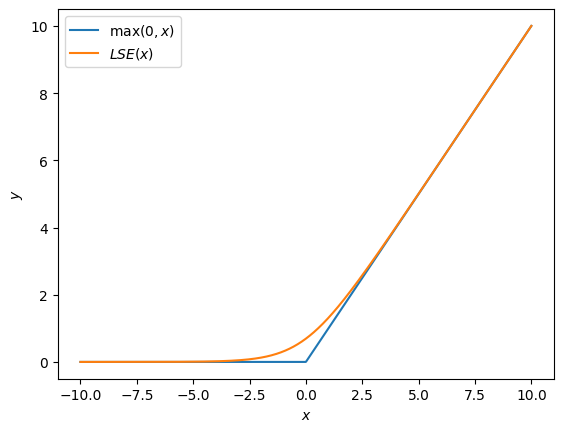

In [16]:
def LSE(x):
    return np.log(1+np.exp(x))

def max0(x):
    return np.maximum(x, 0)

xs = np.linspace(-10,10,1000)
plt.plot(xs, max0(xs))
plt.plot(xs, LSE(xs))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(["$\max(0,x)$", "$LSE(x)$"])
plt.show()

Диапазон изменения аргумента однако может быть значительно шире представленного на графике.
Даже для умеренных значениях аргумента наш способ вычисления функции $LSE$ в числах с плавающей запятой не приводит к успеху. 

C:\Temp\ipykernel_14040\703007615.py:2: RuntimeWarning: overflow encountered in exp
  return np.log(1+np.exp(x))


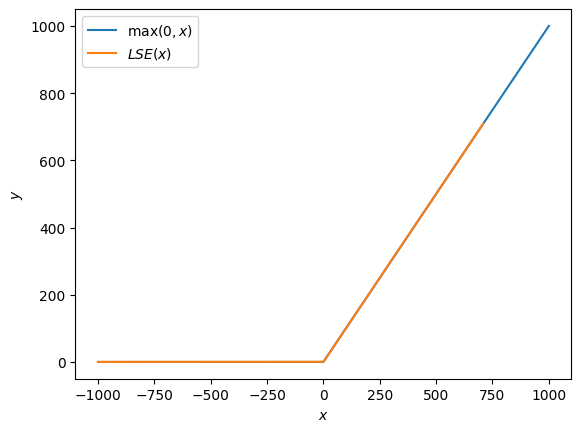

In [17]:
xs = np.linspace(-1000,1000,1000)
plt.plot(xs, max0(xs))
plt.plot(xs, LSE(xs))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(["$\max(0,x)$", "$LSE(x)$"])
plt.show()

## Задание 

### * Объясните, почему при больших значениях аргумента возникает ошибка вычислений?

$(e^x)'=e^x\gg x'=1$, когда $x\gg1$. Таким образом, экспонента растет значительно быстрее линейной функции при больших значениях аргумента и в функции $LSE$ под логарифмом происходит переполнение переменной уже при $x\approx750$.

### * Предложите алгоритм вычислений, работающий при всех значениях аргументов.

Учитывая $e^x\gg1$ при $x\gg1$, можно переписать $LSE(x)=\log (1+e^x)\approx\log e^x=x$, то есть с некоторого значения можно заменить вычисление функции на подставлении ее асимптотики с незначительной потерей точности значений.

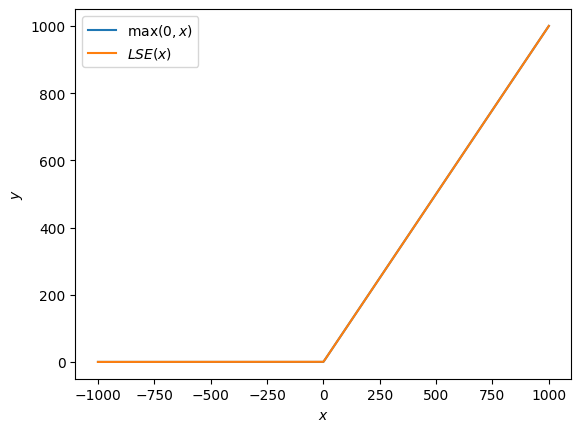

In [18]:
def new_LSE(x):
    if x>100: 
        return x
    else:
        return np.log(1+np.exp(x)) 
    
plt.plot(xs, max0(xs))
new_LSE_Array=[]
for i in xs:
    new_LSE_Array.append(new_LSE(i))
plt.plot(xs, new_LSE_Array)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(["$\max(0,x)$", "$LSE(x)$"])
plt.show()

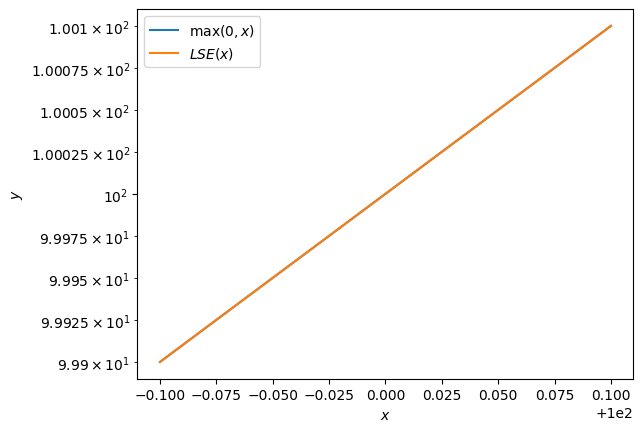

In [19]:
xs1 = np.linspace(99.9,100.1,10)
plt.semilogy(xs1, max0(xs1))
new_LSE_Array=[]
for i in xs1:
    new_LSE_Array.append(new_LSE(i))
plt.semilogy(xs1, new_LSE_Array)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(["$\max(0,x)$", "$LSE(x)$"])
plt.show()

Скачок незаметен.

### Производная этой функции также важна и используется при обучении искуственных нейронных сетей.

$$\mathrm{softmax}(x) = LSE'(x) = \frac{e^x}{1+e^x}.$$ 

График функции выглядит напоминает сглаженную ступеньку.

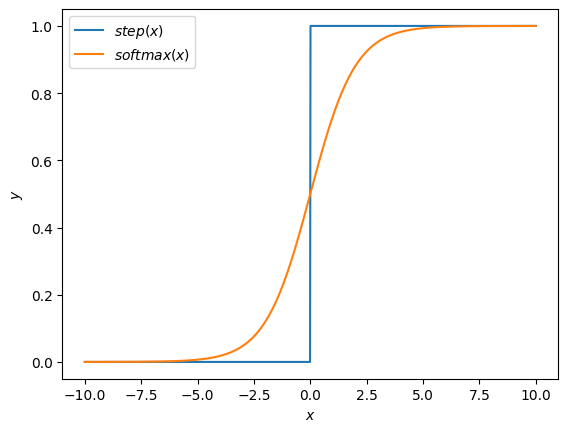

In [20]:
def softmax(x):
    return np.exp(x)/(1+np.exp(x))

def step(x):
    return 0.5*(np.sign(x)+1)

xs = np.linspace(-10,10,1000)
plt.plot(xs, step(xs))
plt.plot(xs, softmax(xs))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(["$step(x)$", "$softmax(x)$"])
plt.show()

### На больших аргументах эту функцию снова не удается вычислить. Можно ли модифицировать softmax так, чтобы она работала на всем допустимом диапазоне для чисел с плавающей запятой?

C:\Temp\ipykernel_17432\104653463.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(x)/(1+np.exp(x))
C:\Temp\ipykernel_17432\104653463.py:2: RuntimeWarning: invalid value encountered in divide
  return np.exp(x)/(1+np.exp(x))


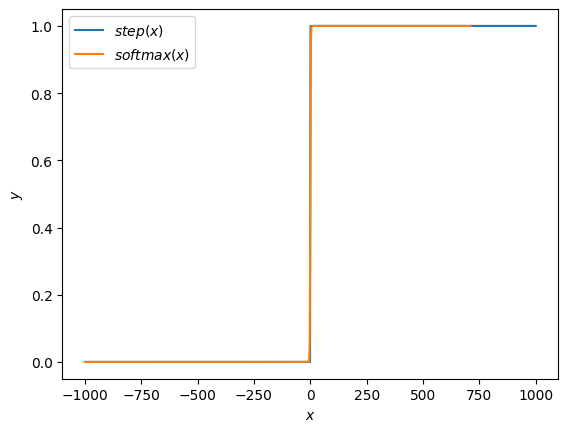

In [39]:
xs = np.linspace(-1000,1000,1000)
plt.plot(xs, step(xs))
plt.plot(xs, softmax(xs))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend(["$step(x)$", "$softmax(x)$"])
plt.show()

Аналогично $$x\gg1\Rightarrow\mathrm{softmax}(x)=\frac{e^x}{1+e^x}\approx 1.$$

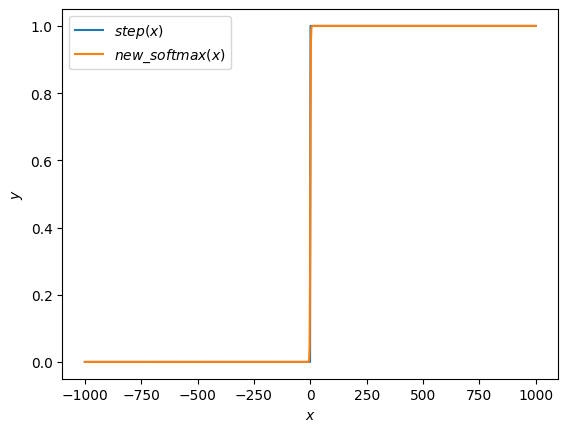

In [23]:
def new_softmax(x):
    if abs(x)>100: 
        return 1 if x > 0 else 0
    else:
        return softmax(x)
    
xs = np.linspace(-1000,1000,1000)
plt.plot(xs, step(xs), label='$step(x)$')
plt.plot(xs, [new_softmax(x) for x in xs], label='$new\_softmax(x)$')
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.legend()
plt.show()

### Попробуем оценить погрешность вычислений функции softmax.
Пусть аргумент дан с машинной точностью, т.е. его отнoсительная погрешность $\sigma x=\epsilon$.

Результат вычисления функции имеет вообще говоря погрешность отличную от погрешности аргумента.
Например, для произвольной гладкой функции $f(x)$ и малой относительной погрешности $\sigma x$ аргумента $x$, предельная относительная погрешность результата оценивается по формуле:

$$\sigma f(x)\approx \kappa_f(x)\sigma x,$$

где $\kappa_f(x)$ - число обусловленности для функции $f$ в точке $x$, вычисляемая по формуле:

$$\kappa_f(x)=\bigg|\frac{f'(x)x}{f(x)}\bigg|.$$

Для экспоненты число обусловленности равно:

$$\kappa_{exp}(x)=\bigg|\frac{e^x x}{e^x}\bigg|=|x|.$$

Значит погрешность вычисления числителя в $softmax$ оценивается так 
$$\sigma\,\mathrm{softmax}(x)\leq|x|\sigma x\leq|x|\epsilon.$$

Для оценки знаменятеля удобнее использовать абсолютную погрешность:

$$|\Delta(1+e^x)|\leq|\Delta 1|+|\Delta e^x|=0+e^x\sigma e^x\leq |x|e^x\epsilon,$$

где мы воспользовались тем фактом, что погрешность константы равна нулю. 
Отсюда получаем предельную относительную погрешность:

$$\sigma(1+e^x)=\frac{|\Delta(1+e^x)|}{1+e^x}\leq \frac{e^x}{1+e^x}|x|\epsilon\leq |x|\epsilon.$$

При делении предельные относительные погрешности складываются, следовательно:

$$\sigma\mathrm{softmax}(x)\leq \sigma e^x+\sigma(1+e^x)\leq 2|x|\epsilon.$$

Результаты вычислений можно свести в таблицу:

|   $a$  |   $\Delta a$   |  $\sigma a$ |
|--------|----------------|-------------|
| $x$  |   |   $\epsilon$ |
| $e^x$ | $e^x|x|\epsilon$  |  $|x|\epsilon$ |
| $1+e^x$ | $e^x|x|\epsilon$ | $|x|\epsilon$ |
| $\frac{e^x}{1+e^x}$ |  | $2|x|\epsilon$ |


Согласно нашим оценкам, погрешность вычислений softmax должна расти с увеличением аргумента.
Попробуем оценить реальную погрешность. 
Функция softmax экспоненциально быстро стремится к единице с ростом аргумента, т.е.

$$1-e^{-x} \leq \mathrm{softmax}(x) \leq 1,\quad x\to\infty.$$

Т.е. для $x>40$ отличие softmax от 1 меньше $10^{-18}<\epsilon$, 
следовательно при оценки погрешности мы можем принять 1 за верное значение для достаточно больших $x$.
Расчет на реальных данных показывает, что в пределах машинной точности отличий от 1 для больших аргументов нет.

In [16]:
xs = np.linspace(40, 700, 1000)
ys = softmax(xs)
err = np.abs((ys-1)/1) # относительная погрешность
print("Максимальная погрешность", np.max(err))
print("Минимальная погрешность", np.min(err))

Максимальная погрешность 0.0
Минимальная погрешность 0.0


## Задание

### * Докажите асимптотику softmax при $x\to\infty$.

$$\lim_{x\to\infty} \mathrm{softmax}(x) = \lim_{x\to\infty}  \frac{e^x}{1+e^x} = \lim_{x\to\infty}  \frac{1}{1+e^{-x}} =  1$$

### * Объясните, почему функция softmax вычисляется значительно точнее, чем мы оценили? Что мы упустили?

Несмотря на то, что с ростом x растет относительная погрешность, при больших $x$ функция $\mathrm{softmax}(x)$, как упомяналось выше, асимптотически стремится к единице, иными словами $1/e^x < \varepsilon $, т.е. при больших $x$ в результате вычисления функции получается точная единица.

### * В выкладках выше мы игнорировали погрешность округления. Что измениться, если ее учесть? 

|   $a$  |   $\Delta a$   |  $\delta a$ |
|--------|----------------|-------------|
| $x$  | $\epsilon x$  |   $\epsilon$ |
| $(e^x)^*$ | $e^x(\|x\|+1 )\epsilon$  |  $(\|x\|+ 1)\epsilon$ |
| $(1+e^x)^*$ | $e^x(\|x\|+2)\epsilon$ | $(\|x\|+2)\epsilon$ |
| $(\frac{e^x}{1+e^x})^*$ |  | $\delta (e^x)^* + \delta (1+e^x)^*$ = $(2\|x\|+3)\epsilon$|

### * Проведите оценки погрешности вычисления функции $LSE$. Составьте таблицу погрешностей промежуточных вычислений.

|   $a$  |   $\Delta a$   |  $\delta a$ |
|--------|----------------|-------------|
| $x$  | $\epsilon x$  |   $\epsilon$ |
| $e^x$ | $e^x \cdot \|x\| \epsilon$  |  $\|x\| \epsilon$ |
| $(e^x)^*$ | $e^x(\|x\|+1 )\epsilon$  |  $(\|x\|+ 1)\epsilon$ |
| $ 1+e^x$ | $(1+e^x) \cdot (\|x\|+1 )\epsilon$  |  $(\|x\|+ 1)\epsilon$ |
| $(1+e^x)^*$ | $e^x(\|x\|+2)\epsilon$ | $(\|x\|+2)\epsilon$ |
| $ \ln(1+e^{x})$ | $\delta_{1+e^{x}} \cdot \ln(1+e^{x})$ | $\frac{(\|x\|+2)\epsilon}{\|\ln(x)\|}$|
| $ (\ln(1+e^{x}))^*$ | $\delta_{(1+e^{x})^*} \cdot \ln(1+e^{x})$ | $\frac{(\|x\|+2)\epsilon}{\|\ln(x)\|} + \epsilon$|